In [ ]:
!pip install yfinance pandas matplotlib plotly scikit-learn seaborn


In [71]:
#IMPORTING USEFUL LIBRARIES

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [ ]:
#ACCESS THE STOCK MARKET DATA

stock = yf.Ticker("TSLA")
df = stock.history(period="1y")  # or "1y", "5d", etc.
df.reset_index(inplace=True)
df.head(365)


In [ ]:
# Calculate Simple Moving Averages
short_window = 50  # Short-term SMA
long_window = 200  # Long-term SMA

df['SMA50'] = df['Close'].rolling(window=short_window).mean()
df['SMA200'] = df['Close'].rolling(window=long_window).mean()

In [ ]:
# Define signals
df['Signal'] = 0  # Initialize Signal column with 0
df.loc[df['SMA50'] > df['SMA200'], 'Signal'] = 1  # Buy
df.loc[df['SMA50'] < df['SMA200'], 'Signal'] = -1  # Sell

In [ ]:
# Create positions (shift signals to avoid look-ahead bias)
df['Position'] = df['Signal'].shift(1)

# Calculate daily percentage change in stock prices
df['Daily Return'] = df['Close'].pct_change()

# Calculate returns based on the strategy
df['Strategy Return'] = df['Position'] * df['Daily Return']

# Calculate cumulative returns
df['Cumulative Market Return'] = (1 + df['Daily Return']).cumprod()
df['Cumulative Strategy Return'] = (1 + df['Strategy Return']).cumprod()

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA50'], label='SMA50', alpha=0.75)
plt.plot(df['SMA200'], label='SMA200', alpha=0.75)
plt.title(f"{stock} Price and Moving Averages")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Cumulative Market Return'], label='Market Return', alpha=0.75)
plt.plot(df['Cumulative Strategy Return'], label='Strategy Return', alpha=0.75)
plt.title("Cumulative Returns")
plt.legend()
plt.show()

In [ ]:
total_strategy_return = df['Cumulative Strategy Return'].iloc[-1] - 1
total_market_return = df['Cumulative Market Return'].iloc[-1] - 1

print(f"Total Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return: {total_market_return:.2%}")

In [ ]:
#SUMMARY OF THE DATA

print(df.describe())  #provides a statistical summary of a DataFrame or Series
# print(df.info())      # provides a concise summary of a DataFrame


In [ ]:
#PLOTTING DATE VS PRICE CHART

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
# plt.plot(df['Date'], df['Close'])
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
# plt.grid(True)
plt.show()


In [72]:
#CANDLESTICK REPRESENTATION

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(title='Candlestick Chart', xaxis_rangeslider_visible=False)
fig.show()


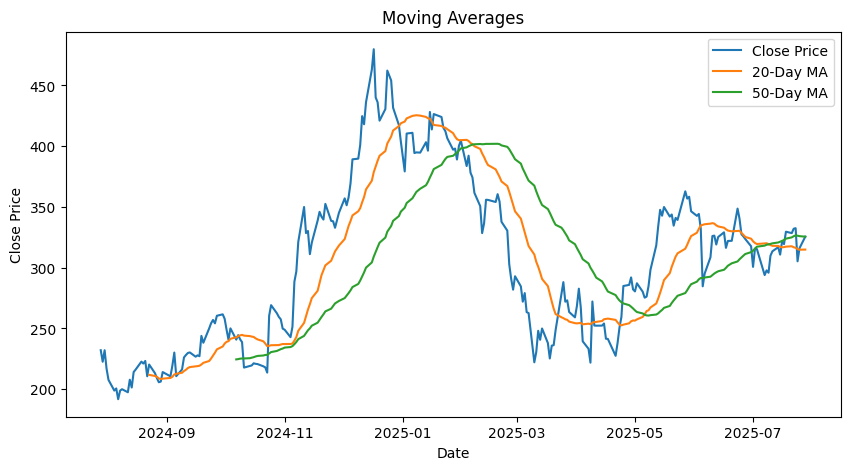

In [73]:
#MOVING AVERAGES(.rolling method())

df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA20'], label='20-Day MA')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Moving Averages')
plt.legend()
plt.show()


In [74]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()


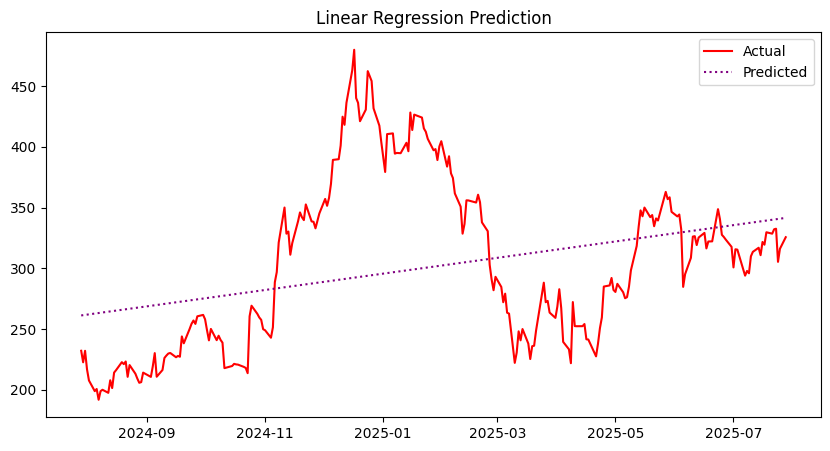

In [75]:
#Predict using LINEAR REGRESSION

df['Date_ordinal'] = pd.to_datetime(df['Date']).map(datetime.toordinal)

X = df[['Date_ordinal']]
y = df['Close']

model = LinearRegression()
model.fit(X, y)

df['Predicted'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Actual', color='red')
plt.plot(df['Date'], df['Predicted'], label='Predicted', linestyle=':',color='purple')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()


In [76]:
#AUTOMATE

def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period="1y")
    df.reset_index(inplace=True)
    return df

data = get_stock_data("TSLA")


In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [ ]:
plt.pie(df['target'].value_counts(), labels=['Down', 'Up'], autopct='%1.1f%%') # will display percentages with one decimal place followed by a percent sign
plt.title('Target Distribution')
plt.show()

In [77]:
# 10. Save Results
df.to_csv("Tesla_Stock_Enhanced.csv", index=False)
print("Processed data saved as 'Tesla_Stock_Enhanced.csv'")


Processed data saved as 'Tesla_Stock_Enhanced.csv'
